In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples
Let's walk through these two functions together

In [ ]:
def difference_of_means(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [ ]:
def one_simulated_difference(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups after shuffling labels
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(
        with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(
        shuffled_table, numeric_label, 'Shuffled Label')

(back to slides)
# Randomized Control Trial
Let's look at the example from the textbook the discusses whether
botulinum toxin A causes pain relief

The data is stored in a csv file named `bta.csv`.
How can we load in the data?

In [ ]:
bta = ...
bta.show()

**QUESTION:** What do the columns and values represent?

What table function can we use to help us figure this out? 

*Hint: what function shows us the statistics about the values a column has?*

<details>
<summary>Solution</summary>
  botox.pivot('Result', 'Group')
</details>

In [ ]:
bta.pivot("Result", "Group")

**QUESTION:** What statistic should we use here to see a difference between the groups?

<details>
<summary>Review</summary>
  Copy the following in markdown below <br>
    ![title](hypothesis_testing_stat_review.png)
</details>

<details>
<summary>Solution</summary>
  difference of means
</details>

**QUESTION:** How do we compute that difference?

<details>
<summary>Solution</summary>
  botox.group('Group', np.average)
    <br><br>
  tmp_tbl = botox.group('Group', np.average)
   <br><br>
    observed_stat = bta_means_tbl.column(1).item(1) - bta_means_tbl.column(1).item(0)
observed_stat
</details>


In [ ]:
bta_means_tbl = bta.group("Group", np.average)
bta_means_tbl

In [ ]:
observed_stat = bta_means_tbl.column(1).item(1) - bta_means_tbl.column(1).item(0)
observed_stat

##  Testing the Hypothesis

**Question:** How can we use the functions from the top?
<details>
<summary>Solution</summary>
  difference of means(botox, 'Result', 'Group')
</details>  

In [ ]:
observed_diff = ...
observed_diff

**Question:** How can we simulate this statistic once?
<details>
<summary>Solution</summary>
  one_simulated_difference(botox, 'Result', 'Group')
</details> 

In [ ]:
one_simulated_difference(bta, 'Result', 'Group')

Now let's simulate that 10k times

In [ ]:
# answer is below
all_simulated_stats = make_array()
for i in np.arange(1e4):
    simulated_stat = one_simulated_difference(bta, 'Result', 'Group')
    all_simulated_stats = np.append(all_simulated_stats, simulated_stat)

len(all_simulated_stats) == 1e4

In [ ]:
Table().with_column('Mean difference of Treatment - Control outcomes', all_simulated_stats).hist() #bins=np.arange(-0.6, 0.6, 0.01))

**Question:** Is the observed statistic statistically significant?

In [ ]:
observed_stat

**Question:** Which of the following is our p-value? 

Hint: Which tail should we use?

In [ ]:
# p-value1
p_1 = sum(all_simulated_stats >= observed_stat)/len(all_simulated_stats)

# p-value2
p_2 = sum(all_simulated_stats <= observed_stat)/len(all_simulated_stats)

p_1, p_2

**Question:** Is this statistically significant?

(back to slides)
# Percentiles

In [ ]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [ ]:
# Step 1. Sort the data
np.sort(x)

In [ ]:
# Step 2. Figure out where 55th percentile would be.
# The Xth percentile is first value on the sorted list that is at least as large as X% of the elements 

In [ ]:
# OR: 1 Line of Code using percentile()
percentile(55, x)

(back to slides)
## Percentiles questions

In [ ]:
s= [1, 7, 3, 9, 5]

In [ ]:
#1 
percentile(10, s) == 0

In [ ]:
# 2 
percentile(39, s) == percentile(40, s)

In [ ]:
# 3
percentile(40, s) == percentile(41, s) 

In [ ]:
# 4
percentile(50, s) == 5 

# Estimation

### Sample Median

In [4]:
sf = Table.read_table('san_francisco_2015.csv')
sf.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2


**Question:** What is this dataset?

In [ ]:
salary_sf.group(0).barh(0)

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# We only care about salary for now
salary_sf = sf.select(3, 11, 21)
salary_sf

**Question:** Who is making the most money?

**Question:** Who is making the least money?

**Question:** What is the typical salary? Should we compute the mean or median for this?

How can we compute the median with what we covered today?
<details>
<summary>Solution</summary>
  percentile(50, sf.column('Total Compensation'))
</details>  

In [ ]:
pop_median = ...
pop_median

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


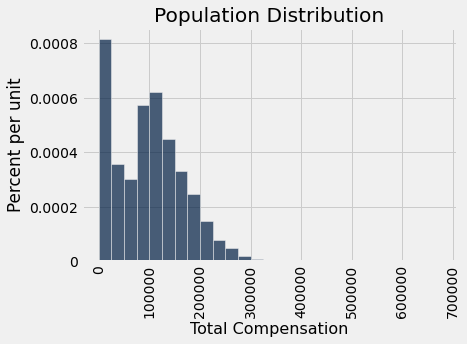

In [14]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

### Estimating Salaries
Say we dont have salaries. What would we do to compute the 50% percentile of salaries?

In [ ]:
# skip

In [ ]:
# skip

In [6]:
# skip
sf.num_rows

42989

In [7]:
our_sample = sf.sample(4000, with_replacement=False)
our_sample.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5203,Asst Engr,1340,100554,0,0,100554,20724.8,12424.5,8129.77,41279.1,141833
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1091,IT Operations Support Admin I,49325,61428,2036.6,932.3,64396.9,12853.6,12424.5,5263.76,30541.9,94938.8
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2700,Housekeeping & Laundry,2736,Porter,45350,22136.8,0,3193.02,25329.8,5449.99,4895.13,1997.46,12342.6,37672.3
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",2500,Med Therapy & Auxiliary,2574,Clinical Psychologist,5291,48255.8,0,40,48295.8,9086.3,6731.93,3905.64,19723.9,68019.7
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2600,Dietary & Food,2604,Food Service Worker,635,10183.8,72.33,270.4,10526.5,0,3153.91,815.17,3969.08,14495.6


In [8]:
estimate_median = percentile(50, our_sample.column('Total Compensation'))
estimate_median

98639.08

In [9]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

98174.9

In [12]:
error = abs(estimate_median - pop_median)
error

464.18000000000757

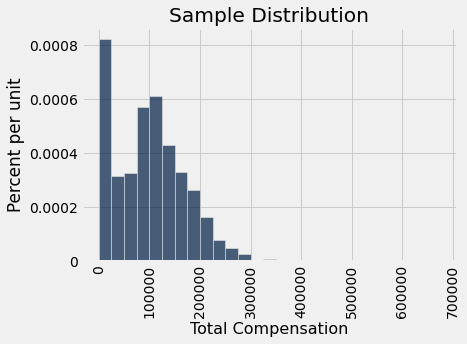

In [15]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

**Question:** How far off is our estimate from the true median?

**Question:** How far off is our estimate from the true median

In [ ]:
pop_median, estimate_median, abs(pop_median - estimate_median)

## Variability of the Estimate

Let's implement the following function:

<details>
<summary>Solution</summary>
  our_sample = sf.sample(samp_size, with_replacement=False)
  return percentile(50, our_sample.column('Total Compensation'))
</details>


In [19]:
def generate_sample_median(samp_size):
    """
    Given a sample size
    Returns the median of a random sample of samp_size from the sf table"""
    # Question: sample with or without replacement?
    random_sample = sf.sample(samp_size, with_replacement=False)
    sample_median = percentile(50, random_sample.column('Total Compensation'))
    return sample_median
    

sample_median = generate_sample_median(300)
sample_median

100958.48

**Question:** What is our error?


<details>
<summary>Solution</summary>
  error = sample_median - pop_median
</details>


In [20]:
error = sample_median - pop_median
error

2783.5800000000017

(back to slides)
# Quantifying Uncertainty

Lets take 1k estimates where each sample has 300 individuals


In [21]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)
sample_medians

array([103718.59,  96872.22, 105268.49,  90725.  , 104598.64, 100395.91,
       100972.56, 107400.74, 105501.27,  96958.15, 101324.11, 109134.39,
       103586.29,  95579.42,  99834.39, 100388.14,  99038.1 , 100086.76,
       100883.2 ,  91873.64, 101849.38,  99781.15,  91893.07,  97084.57,
        89482.98, 104525.74,  99590.6 , 101663.35,  94138.38,  98112.82,
        98413.5 ,  94906.24,  99928.97,  93123.7 ,  97408.76,  92034.08,
        91668.38, 101893.84, 100896.6 ,  98813.64,  97585.67,  94445.94,
        94261.31,  98299.51,  99939.96,  99897.83,  99770.04, 102135.5 ,
        92494.75,  95963.87,  92777.93,  94966.65,  94668.72,  97004.45,
        99075.16,  96388.52, 105132.01,  95810.81,  88282.12, 100106.45,
       101698.27,  97789.21,  95189.7 ,  99942.88, 108427.59, 101304.96,
        95631.8 ,  93791.57,  88151.7 ,  87599.94, 101942.56,  96952.33,
       103602.16,  99029.6 , 100891.4 ,  98637.79,  98156.4 , 102054.98,
        97843.96,  98892.54,  85859.05,  91656.64, 

Let's plot the medians

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


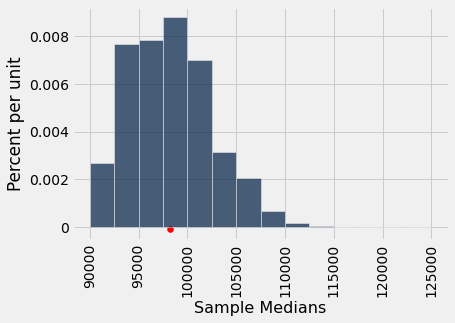

In [22]:
med_bins = np.arange(90000, 125001, 2500)
Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, -1e-6, color="red");

Lets plot the errors

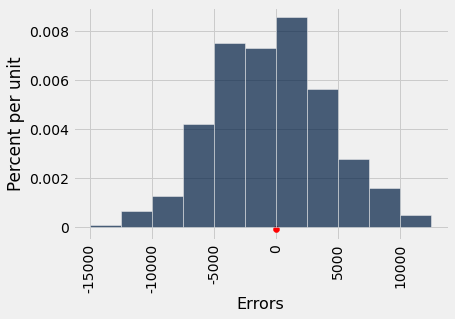

In [23]:
err_bins = np.arange(-15000, 12501, 2500)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");

(back to slides)
# Bootstrap

In [25]:
our_sample = sf.sample(300, with_replacement=False)

In [35]:
# Take a bootstrap (re)sample of size 300, WITH replacement

# Sample from our sample
boot_sample = our_sample.sample(with_replacement=True)
#boot_sample

Let's compare the median from our sample with the median of the boostrapped sample

In [36]:
boot_sample.num_rows

300

In [30]:
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
boot_sample_median = percentile(50, boot_sample.column('Total Compensation'))

In [31]:
our_sample_median, boot_sample_median

(103956.26, 103956.26)

Population Median =        98174.9
Our Sample Median =        103956.26
Bootstrap Sample Median =  106369.39


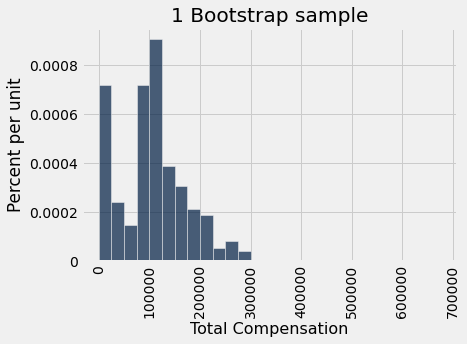

In [37]:
# Show the bootstrap sample 
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

### Multiple Bootstraps
Let's take 1k bootstraps. Lets start by implementing the following function

<details>
<summary>Solution</summary>
   single_sample = our_sample.sample()
   return percentile(50, single_sample.column('Total Compensation'))
</details>  

In [38]:
def one_bootstrap_median():
    single_sample = our_sample.sample(with_replacement=True)
    return percentile(50, single_sample.column("Total Compensation"))

Now let's keep track of 1k bootstrapped median

In [40]:
one_bootstrap_median()

99928.95

In [41]:
# Bootstrap our sample 1000 times
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

In [43]:
len(bootstrap_medians)

1000

Let's visualize these bootstrapped medians

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


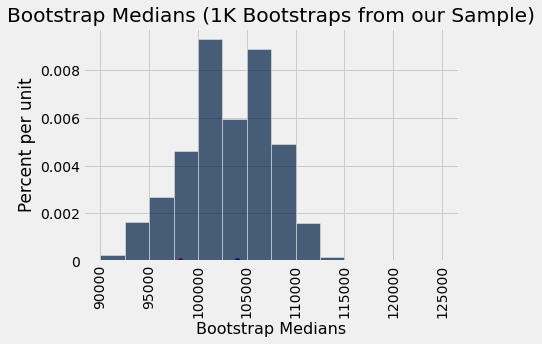

In [44]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

In [45]:
percentile(50, bootstrap_medians)

103956.26

In [46]:
percentile(2.5, bootstrap_medians), percentile(97.5, bootstrap_medians)

(93992.5, 111233.71)

# 95% Confidence Interval

**Question**: How could we make an interval based on the middle 95% of bootstrap samples?

- *Hint 1:* Remember we stored the bootstrapped medians in an array called `bootstrap_medians`
- *Hint 2:* What did we learn about in the begining of this lecture?


<details>
<summary>Solution</summary>
  left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)
</details>  

In [47]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

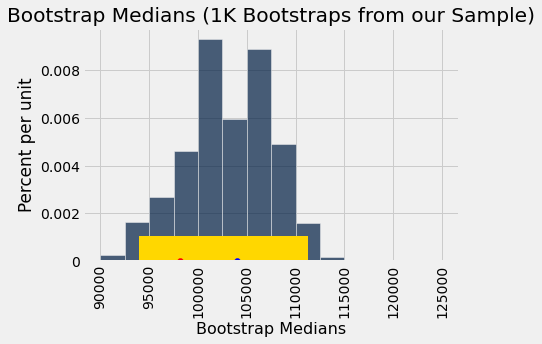

In [50]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=50, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

In [51]:
pop_median

98174.9

## Another Example: Mean Maternal Age

In [ ]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

How can we see a distribution of maternal ages?

<details>
<summary>Solution</summary>
  births.hist('Maternal Age')
</details>  

What is the mean age?

In [ ]:
mean_age = ...
mean_age

Now let's use bootstraping to find samples means

<details>
<summary>Solution</summary>
  np.mean(births.sample().column('Maternal Age'))
</details>  

In [ ]:
def one_bootstrap_mean():
    return ...

Let's compute 1k bootstrapped samples

In [ ]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

In [ ]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');